### Q11
solution from Chaolun

#### a)
Code for DFP method are written as follow:

Iteration: 200 Tolerance: 51.131259
 x: 
[[-1.18718896]
 [ 1.3180649 ]]


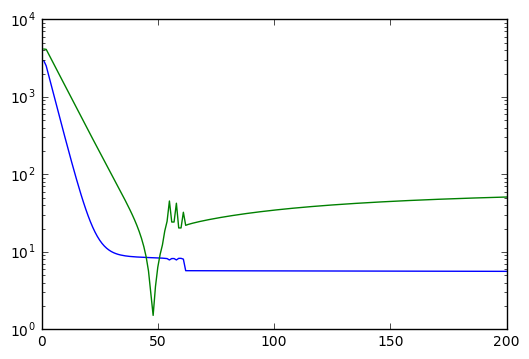

In [25]:
import numpy as np
import functools as ft
import matplotlib.pyplot as plt
%matplotlib inline

#constant
ITMAX=200
ep=1e-3
inialf=1
c=0.9
scale=0.5

#build the cost function
def f(x):
    return 100*(x[0]**2-x[1])**2+(1-x[0])**2

#build the gradient function
def gradf(x):
    gx=np.zeros([2,1])
    gx[0]=400*(x[0]**3-x[0]*x[1])+2*x[0]-2
    gx[1]=-200*(x[0]**2-x[1])
    return gx

#initialization
tol=1
x=np.transpose(np.array([[-2,-2]]))
H=np.array([[1,0],[0,1]])
n=0
sol1=np.zeros([3,ITMAX])

#main loop
while tol>=ep and n<ITMAX:
    n+=1
    gf=gradf(x)
    df=-1*np.dot(H,gf)

    alf=inialf
    while f(x+alf*df)>f(x)+c*alf*np.dot(np.transpose(gf),df):
        alf=scale*alf
    xold=x
    p=alf*df
    x=x+p
    y=gradf(x)-gradf(xold)
    H=H \
      -ft.reduce(np.dot, [H,y,np.transpose(y),H])/ft.reduce(np.dot, [np.transpose(y), H, y]) \
      +np.dot(p, np.transpose(p))/np.dot(np.transpose(y), p)
    tol=np.linalg.norm(gradf(x))
    sol1[0][n-1]=n
    sol1[1][n-1]=f(x)
    sol1[2][n-1]=tol
print("Iteration: %d Tolerance: %f\n x: "%(n, tol))
print (x)
plt.semilogy(sol1[0], sol1[1], sol1[0], sol1[2])


The green curve indicate the gradient norm and blue curve indicate the function evaluation

Since the idea of the DFP and also the BFGS method is to approximate the Hessian matrix of f(x) (H(f(x))) with H, the stability and the convergence speed is determined by the condition number of H(f(x)). The intuition is that cond(H)is defined by: $\lambda_{max}(H)/\lambda_{min}(H)$ , thus if the condition number is large, which means the eigen values varies alot, the Hessian matrix will resize the length of the vector $\Delta f$ very differently based on the direction of $\Delta f$. If the direction of $\Delta f$ is approximate to the eigenvector corresponding to the $\lambda_{max}(H)$, the length of $H\Delta f$ could be much larger compared to $\Delta f$, thus lead to unstable.  In this problem, we have:
$$
H(x)=
\begin{bmatrix} 
 400(3x_1^2-x_2)+2& -400x_1 \\
-400x_1 & 200 
\end{bmatrix}
$$
when near the saddle point the function converge to( $x=[-1.19, 1.31]^T$ ), we have:
$$
H(x)=
\begin{bmatrix} 
 1177.3& 476 \\
 476 & 200 
\end{bmatrix}
$$
which makes cond(H)=211.5 (with l2 matrix norm), which is extremely large. So the optimization is not stable for f(x) espesially when close to that saddle point, which make the optimization nolonger progress.


#### b)
Code for BFGS method are written as follow:

Iteration: 200 Tolerance: 0.009870
 x: 
[[ 0.99883262]
 [ 0.99763996]]


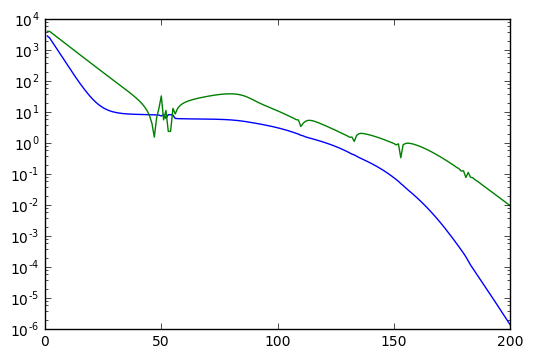

In [26]:
import numpy as np
import functools as ft
import matplotlib.pyplot as plt
%matplotlib inline

#constant
ITMAX=200
ep=1e-3
inialf=1
c=0.9
scale=0.5

#build the cost function
def f(x):
    return 100*(x[0]**2-x[1])**2+(1-x[0])**2

#build the gradient function
def gradf(x):
    gx=np.zeros([2,1])
    gx[0]=400*(x[0]**3-x[0]*x[1])+2*x[0]-2
    gx[1]=-200*(x[0]**2-x[1])
    return gx

#initialization
tol=1
x=np.transpose(np.array([[-2,-2]]))
B=np.array([[1,0],[0,1]])
n=0
sol2=np.zeros([3,ITMAX])

#main loop
while tol>=ep and n<ITMAX:
    n+=1
    gf=gradf(x)
    ivB=np.linalg.inv(B)
    df=-1*np.dot(ivB,gf)
    alf=inialf
    while f(x+alf*df)>f(x)+c*alf*np.dot(np.transpose(gf),df):
        alf=scale*alf
    xold=x
    s=alf*df
    x=x+s
    y=gradf(x)-gradf(xold)
    B=B \
      -ft.reduce(np.dot, [B,s,np.transpose(s),B])/ft.reduce(np.dot, [np.transpose(s), B, s]) \
      +np.dot(y, np.transpose(y))/np.dot(np.transpose(y), s)
    tol=np.linalg.norm(gradf(x))
    sol2[0][n-1]=n
    sol2[1][n-1]=f(x)
    sol2[2][n-1]=tol
print("Iteration: %d Tolerance: %f\n x: "%(n, tol))
print (x)   
plt.semilogy(sol2[0], sol2[1], sol2[0], sol2[2])

The green curve indicate the gradient norm and blue curve indicate the function evaluation

#### c)
The BFGS converges to the saddle point $x=[-2, 4]^T$ firstly,before 50 iterations, just like the DFP method, but the speed of convergence is faster. However, after that, the BFGS method abandons that saddle point and gradually moves towards the true solution $x=[1, 1]^T$

#### d)
Plot for DFT method and BFGS method are in a) b) separately.
The green curve indicate the gradient norm and blue curve indicate the function evaluation

#### e)
The line search method used in the code is backtracking line search. The pseudocode is shown as following:

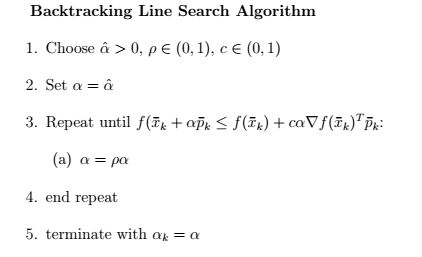

In [23]:
from IPython.display import Image
Image("figure.jpg")

#### f)
The BFGS method converge faster than DFP, thus it has higher accuracy given the same amount of iteration. Also BFGS are more robust to the ill conditioned problem compared to the DFP method, which stop to make progress when condition number of Hessian matirx is large. 

Since the f(x) is ill conditioned, the gradient norm oscillates for both of the problem. However, the gradient norm of BFGS method drops gradually despite from the oscillation, whereas for the DFP method, the gradient norm start to rise after 60 iterations.